## Google App Rating Analysis

In [38]:
import pandas as pd
dF = pd.read_csv('Data_set.csv')
dF

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [39]:
dF.shape

(10841, 13)

In [40]:
dF.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [41]:
dF.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:>

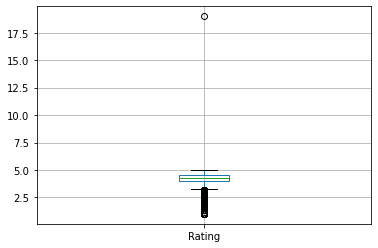

In [42]:
dF.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

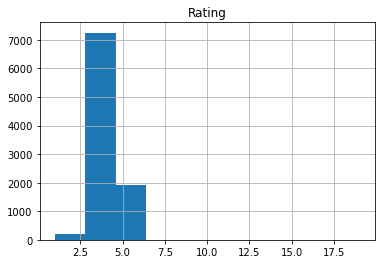

In [43]:
dF.hist()

In [44]:
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


.
### 1) Data Cleaning

In [45]:
dF.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##### Check how many ratings are more than  - outliers

In [46]:
# From box plot we can see there is one outlier need to find it out

# selecting the Rating column > 5
dF['Rating'] > 5

# getting the datafram
dF[dF['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


##### Removing the above record

In [47]:
# specifing the row number and removing
dF.drop([10472], inplace = True)

In [48]:
dF.shape

(10840, 13)

##### Draw box plot and histogram again

<AxesSubplot:>

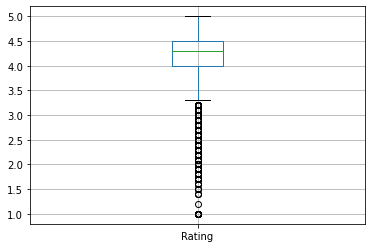

In [49]:
dF.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

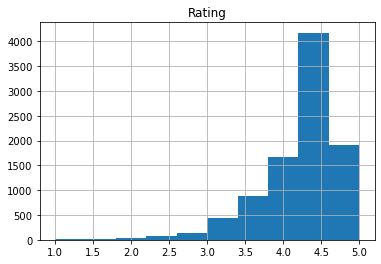

In [50]:
dF.hist()

##### Removing the column which have 90% of data as Null

In [51]:
threshold = len(dF)*0.1
threshold

1084.0

In [52]:
# removing the column which have Null values
dF.dropna(thresh = threshold, axis = 1, inplace = True)

# show data
dF.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [53]:
dF.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

.
### 2) Data Manipulation

##### Fill the null values with appropriate values using aggregate functins such as mean, median or mode.

In [54]:
# defining the function to do so
def input_median(serie_):
    return serie_.fillna(serie_.median())

In [55]:
# replacing the null value of Rating column
dF['Rating'] = dF['Rating'].transform(input_median)

In [56]:
# checking the null values
dF.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [57]:
# getting the mode value
T_mode = dF['Type'].mode()
CV_mode = dF['Current Ver'].mode()
AV_mode = dF['Android Ver'].mode()

# replacing null with mode
dF['Type'].fillna(str(T_mode.values[0]), inplace = True)
dF['Current Ver'].fillna(str(CV_mode.values[0]), inplace = True)
dF['Android Ver'].fillna(str(AV_mode.values[0]), inplace = True)

# checking null
dF.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

.
### 3) Converting the Price, Reviews, and Rating into Numerical values

In [58]:
dF.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [59]:
dF.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [60]:
# rating already a numerical value

# selecting price column and removing $ sign
dF['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

# assigning back to same column
dF['Price'] = dF['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

# assigning back to same column and also making it float data type
dF['Price'] = dF['Price'].apply(lambda x: float(x))

# checking data type
dF.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [61]:
# Now for review column
dF['Reviews'] = pd.to_numeric(dF['Reviews'], errors = 'coerce')

# checking data type
dF.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [62]:
# now for Installs columns

# replacing $ with nothing
dF['Installs'] = dF['Installs'].apply(lambda x : str(x).replace('$', '') if '$' in str(x) else str(x))

# converting to float
dF['Installs'] = dF['Installs'].apply(lambda x : float(x))

# convert using pandas library if there is error
# coerce means ignore any error
dF['Installs'] = pd.to_numeric(dF['Installs'], errors = 'coerce')

# checking data type
dF.dtypes

ValueError: could not convert string to float: '10,000+'

In [ ]:
# replacing + with nothing
dF['Installs'] = dF['Installs'].apply(lambda x : str(x).replace('+', '') if '+' in str(x) else str(x))

# replacing , with nothing
dF['Installs'] = dF['Installs'].apply(lambda x : str(x).replace(',', '') if ',' in str(x) else str(x))

# converting to float
dF['Installs'] = dF['Installs'].apply(lambda x : float(x))

# checking data type
dF.dtypes

In [63]:
dF.describe()

,Rating,Reviews,Price
count,10840.000000,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.027368
std,0.480342,2.927761e+06,15.949703
min,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,0.000000
50%,4.300000,2.094000e+03,0.000000
75%,4.500000,5.477550e+04,0.000000
max,5.000000,7.815831e+07,400.000000


.
### 4) Data visualization

In [64]:
dF.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [66]:
import numpy as np

In [69]:
# group by Category
dF.groupby('Category')

# aggrgating/appending the mean values of specific column to variable x, y, and z
x = dF.groupby('Category')['Rating'].agg(np.mean)
y = dF.groupby('Category')['Price'].agg(np.mean)
z = dF.groupby('Category')['Reviews'].agg(np.mean)

print(x)
print("****************************************************")
print(y)
print("****************************************************")
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

In [71]:
import matplotlib.pyplot as plt

C:\Users\Vinod\AppData\Local\Temp\ipykernel_12460\1742837838.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, 'ro', color = 'r')


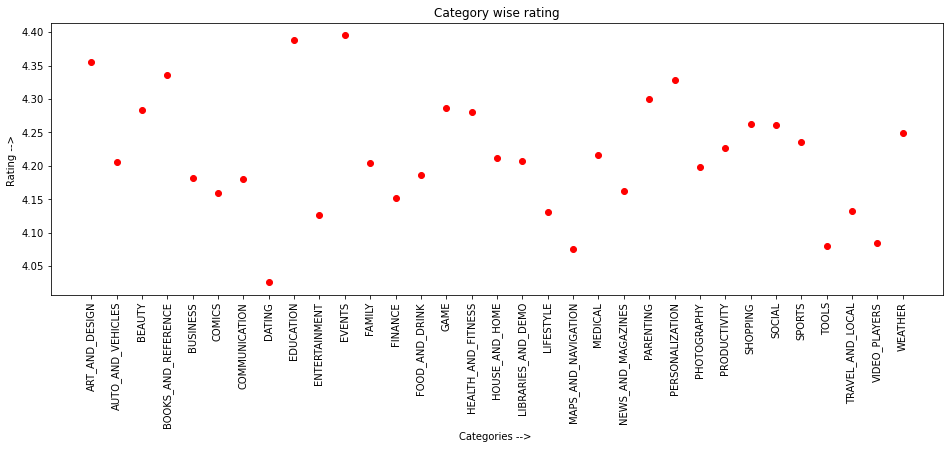

In [75]:
# defining the size
plt.figure(figsize = (16, 5))

# ploting the x data
# 'ro' means bubble
plt.plot(x, 'ro', color = 'r')

# marking x axis
plt.xticks(rotation = 90)

# title
plt.title('Category wise rating')

# x and y axis label
plt.xlabel('Categories --> ')
plt.ylabel('Rating --> ')

# show plot
plt.show()

C:\Users\Vinod\AppData\Local\Temp\ipykernel_12460\661557079.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(y, 'r--', color = 'b')


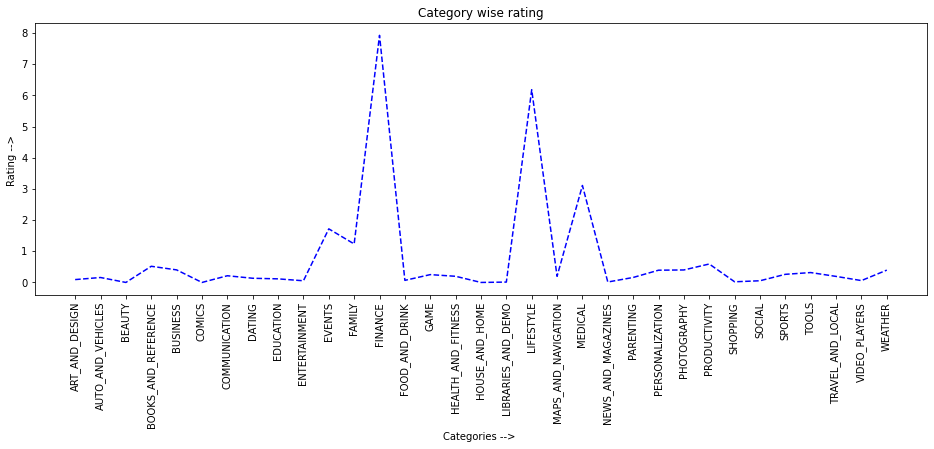

In [76]:
# defining the size
plt.figure(figsize = (16, 5))

# ploting the x data
# 'r--' means -- graph
plt.plot(y, 'r--', color = 'b')

# marking x axis
plt.xticks(rotation = 90)

# title
plt.title('Category wise rating')

# x and y axis label
plt.xlabel('Categories --> ')
plt.ylabel('Rating --> ')

# show plot
plt.show()

C:\Users\Vinod\AppData\Local\Temp\ipykernel_12460\2812801445.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs" (-> color='r'). The keyword argument will take precedence.
  plt.plot(z, 'rs', color = 'g')


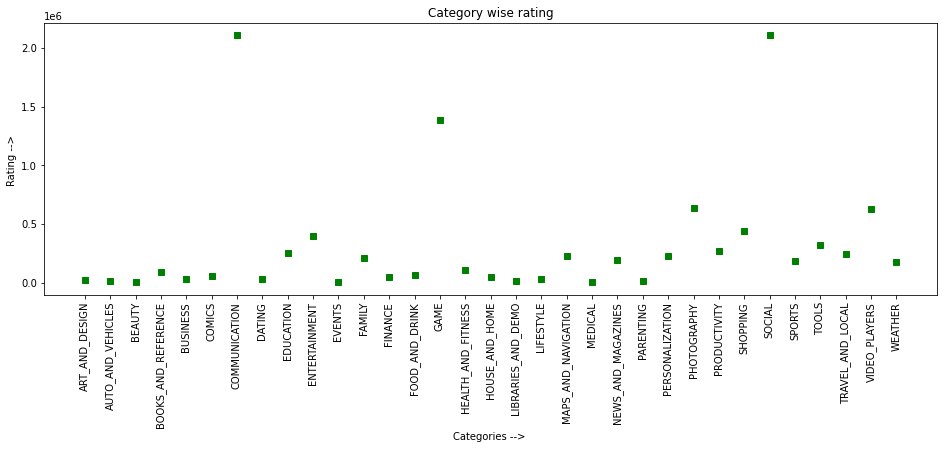

In [78]:
# defining the size
plt.figure(figsize = (16, 5))

# ploting the x data
# 'rs' means box
plt.plot(z, 'rs', color = 'g')

# marking x axis
plt.xticks(rotation = 90)

# title
plt.title('Category wise rating')

# x and y axis label
plt.xlabel('Categories --> ')
plt.ylabel('Rating --> ')

# show plot
plt.show()